In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.figsize': (4.8, 2.7), 'font.size': 15, 'lines.linewidth': 2,
    'xtick.labelsize': 13, 'ytick.labelsize': 13,
    'axes.spines.top': False, 'axes.spines.right': False,
    'savefig.dpi': 1200,
})

import yaml
import numpy as np

from irc.manager import IRCManager

# Train a rational agent

We first train a rational agent for a given foraging environment. The environment can be specified by a dictionary object or a yaml file.

The example environment is a `boxforage.env.IdenticalBoxesEnv` instance, whose parameters are the following:
- $p_\mathrm{appear} \in [0, 1]$: food appear probability.
- $p_\mathrm{vanish} \in [0, 1]$: food vanish probability.
- $p_\mathrm{cue} \in [0, 1]$: color cue parameter. The closer $p_\mathrm{cue}$ is to 0 or 1, the higher discriminability will be.
- $\lambda_\mathrm{center} \in (0, 1)$: vintage point parameter. Greater value means higher discriminability of color cues when viewed at the room center.
- $r_\mathrm{food} \in [0, \infty)$: reward of food.
- $r_\mathrm{move} \in (-\infty, 0]$: reward of moving per unit distance.

The agent we train assumes an environment with parameter $(0.2, 0.05, 0.8, 0.1, 10, -1)$, and updates its belief with respect to the internal environment.

In [2]:
manager = IRCManager(
    agent_defaults='irc_defaults/identical_boxes.yaml',
)
env_param = (0.2, 0.05, 0.8, 0.1, 10., -1.)
num_epochs = 30
agent = manager.train_agent(env_param=env_param, num_epochs=num_epochs)

Checkpoint (epoch 30) loaded.


The snippet above can also be run from command line via `train-one-agent.py`.

In [3]:
!python train-one-agent.py env_param=[0.2,0.05,0.8,0.1,10,-1] num_epochs=30

Checkpoint (epoch 30) loaded.


# Inspect training progress

We can check the RL training progress of an agent, and assess whether it has reached equilibrium.

Fetching the most trained agent so far (epoch 30).


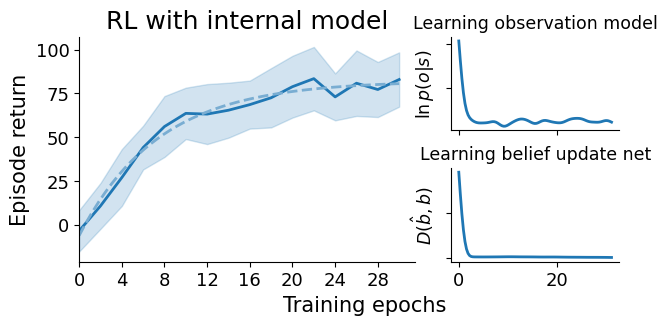

In [4]:
env_param = (0.2, 0.05, 0.8, 0.1, 10., -1.)
agent, fig = manager.inspect_agent(env_param)

Next we run this agent in an environment different from its assumption. At each step, we can also query the agents belief about environment states (with respect to its own assumption). In the two-boxes example below, probabilities of all four possible food availabilty states will be plotted.

In [5]:
from boxforage.env import IdenticalBoxesEnv

env = IdenticalBoxesEnv(
    p_appear=0.2, p_vanish=0.1, p_cue=0.7,
)
print(f'Real environment parameter: {tuple(env.get_param())}')
print(f'Assumed environment parameter: {tuple(agent.model.env.get_param())}')

episode = agent.run_one_episode(env=env)

Real environment parameter: (0.2, 0.1, 0.7, 0.1, 10.0, -1.0)
Assumed environment parameter: (0.2, 0.05, 0.8, 0.1, 10.0, -1.0)


Plot probabilities of all four food availability combinations


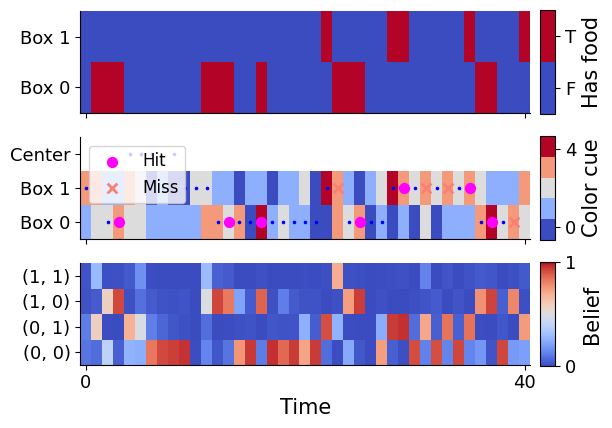

Plot marginal probability of two boxes


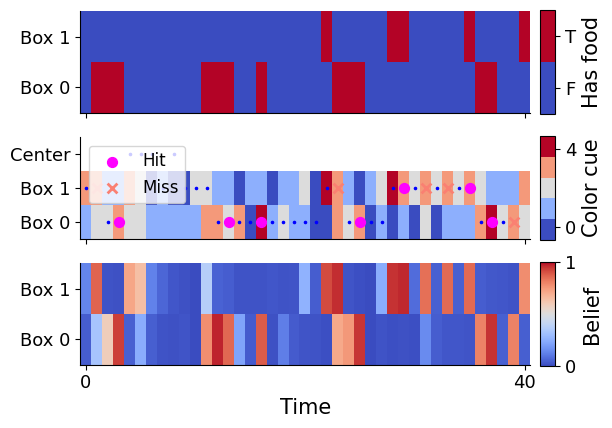

In [6]:
from boxforage.utils import plot_episode

print('Plot probabilities of all four food availability combinations')
fig = plot_episode(episode)

plt.show()

print('Plot marginal probability of two boxes')
fig = plot_episode(episode, plot_marginal=True)